In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
%cd ../gdrive/MyDrive/CSE_575/

/gdrive/.shortcut-targets-by-id/1ZOjaaJR6FUgi-AiS0aWel7Gqn2TpkqgW/CSE_575


In [4]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
from sklearn.metrics import classification_report as cr, confusion_matrix as cm

In [5]:
# Helper Functions
def load_data():
    ohe = OneHotEncoder(sparse=False)
    X = np.load("X.npy")[:,:,:,:3]
    y = np.load("y.npy")
    y = ohe.fit_transform(y.reshape(-1,1))
    labels = ohe.categories_
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)
    return X_train, X_test, y_train, y_test, labels[0]

In [6]:
# Loading Data
X_train, X_test, y_train, y_test, labels = load_data()

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [7]:
# Model Definition
model_layers = [
    Conv2D(32, 11, activation="tanh", input_shape=(288,432,3)),
    MaxPool2D(5),
    Conv2D(64, 11, activation="tanh"),
    MaxPool2D(5),
    Dropout(0.5),
    Flatten(),
    Dense(10,activation="softmax")
    ]

model = Sequential(model_layers)
optim =  Adam(learning_rate=1e-3)
model.compile(loss="categorical_crossentropy",optimizer=optim, metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 278, 422, 32)      11648     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 55, 84, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 74, 64)        247872    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 14, 64)        0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 9, 14, 64)         0         
                                                                 
 flatten (Flatten)           (None, 8064)              0

In [8]:
# Model Training
model.fit(X_train,y_train,batch_size=32,epochs=15,validation_split=0.2)
print(f"Model Performance on Training Data: {model.evaluate(X_train,y_train)}")

Epoch 1/35
20/20 [==============================] - 20s 338ms/step - loss: 2.4667 - accuracy: 0.1737 - val_loss: 2.0542 - val_accuracy: 0.2812
Epoch 2/35
20/20 [==============================] - 4s 206ms/step - loss: 2.0234 - accuracy: 0.2973 - val_loss: 1.9834 - val_accuracy: 0.3125
Epoch 3/35
20/20 [==============================] - 3s 173ms/step - loss: 1.7217 - accuracy: 0.3834 - val_loss: 1.7945 - val_accuracy: 0.3875
Epoch 4/35
20/20 [==============================] - 3s 154ms/step - loss: 1.4406 - accuracy: 0.4961 - val_loss: 1.6900 - val_accuracy: 0.4000
Epoch 5/35
20/20 [==============================] - 3s 154ms/step - loss: 1.3157 - accuracy: 0.5462 - val_loss: 1.4707 - val_accuracy: 0.4750
Epoch 6/35
20/20 [==============================] - 3s 172ms/step - loss: 1.2216 - accuracy: 0.5446 - val_loss: 1.6273 - val_accuracy: 0.5312
Epoch 7/35
20/20 [==============================] - 3s 161ms/step - loss: 1.1312 - accuracy: 0.6182 - val_loss: 1.5830 - val_accuracy: 0.5063
Epoch

7/7 [==============================] - 1s 107ms/step
              precision    recall  f1-score   support

           0       0.64      0.50      0.56        14
           1       0.73      1.00      0.85        11
           2       0.73      0.42      0.54        26
           3       0.63      0.71      0.67        24
           4       0.82      0.85      0.84        27
           5       0.68      0.81      0.74        16
           6       0.94      0.89      0.91        18
           7       0.80      0.35      0.48        23
           8       0.68      0.71      0.70        21
           9       0.71      0.60      0.65        20

   micro avg       0.73      0.67      0.70       200
   macro avg       0.74      0.68      0.69       200
weighted avg       0.74      0.67      0.68       200
 samples avg       0.67      0.67      0.67       200

[[10  0  0  1  1  1  0  0  1  0]
 [ 0 11  0  0  0  0  0  0  0  0]
 [ 4  1 11  2  0  3  0  1  1  3]
 [ 2  0  0 17  2  0  1  1  1  0]
 [

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


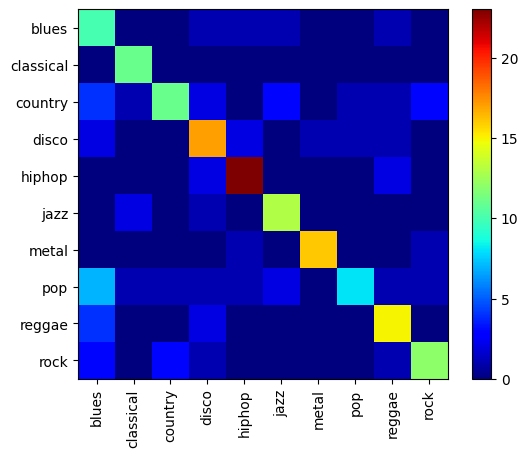

In [9]:
pred = model.predict(X_test)
pred = (pred>0.5)

print(cr(y_test,pred))
conf_m = cm(np.argmax(y_test,axis=1),np.argmax(pred,axis=1))
print(conf_m)

plt.imshow(conf_m,cmap="jet")
plt.xticks(ticks = np.arange(0,10,1), labels=labels, rotation=90)
plt.yticks(ticks = np.arange(0,10,1), labels=labels)
plt.colorbar()
plt.show()

In [10]:
# Classwise Accuracy
class_acc = conf_m.diagonal()/conf_m.sum(axis=1)
for i in range(len(labels)):
  print(f"Class Accuracy for {labels[i]}: {round(class_acc[i],2)}")
print(f"\n**Total Accuracy : {np.trace(conf_m)/np.sum(conf_m)}**")

Class Accuracy for blues: 0.71
Class Accuracy for classical: 1.0
Class Accuracy for country: 0.42
Class Accuracy for disco: 0.71
Class Accuracy for hiphop: 0.85
Class Accuracy for jazz: 0.81
Class Accuracy for metal: 0.89
Class Accuracy for pop: 0.35
Class Accuracy for reggae: 0.71
Class Accuracy for rock: 0.6

**Total Accuracy : 0.68**
